<a href="https://colab.research.google.com/github/carranza96/DLSeminar/blob/TSF/notebooks/IntroDL_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install tensorflow==2.1
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 38.4MB/s 
     |████████████████████████████████| 450kB 44.2MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
# Fix random seed to allow reproducible experiments
np.random.seed(1)
tf.random.set_seed(1)

# Load and inspect Cryptocurrency market data

In [0]:
# Read training set
train_filename = 'data/train.csv'
with open(train_filename, 'r') as datafile:
  ts_list_train = datafile.readlines()
  ts_list_train = np.asarray([np.asarray(l.rstrip().split(','), dtype=np.float32) for l in ts_list_train])

# Read test set
test_filename = 'data/train.csv'
with open(test_filename, 'r') as datafile:
  ts_list_test = datafile.readlines()
  ts_list_test = np.asarray([np.asarray(l.rstrip().split(','), dtype=np.float32) for l in ts_list_test])

In [0]:
headers = ['BTC', 'ETH', 'XRP', 'LTC']
most_recent_measure = datetime.datetime(2020, 2, 5, 1,0)
colors = plt.get_cmap('Set2', 4)

In [78]:
colors(4)

(1.0, 0.9294117647058824, 0.43529411764705883, 1.0)

In [101]:
print("Length of {0} time serie: {1} hours. From {2} to {3}.".format(headers[0], ts_list_train[0].shape[0], most_recent_measure - datetime.timedelta(hours=ts_list_train[0].shape[0]-1), most_recent_measure))
print("Length of {0} time serie: {1} hours. From {2} to {3}.".format(headers[1], ts_list_train[1].shape[0], most_recent_measure - datetime.timedelta(hours=ts_list_train[1].shape[0]-1), most_recent_measure))
print("Length of {0} time serie: {1} hours. From {2} to {3}.".format(headers[2], ts_list_train[2].shape[0], most_recent_measure - datetime.timedelta(hours=ts_list_train[2].shape[0]-1), most_recent_measure))
print("Length of {0} time serie: {1} hours. From {2} to {3}.".format(headers[3], ts_list_train[3].shape[0], most_recent_measure - datetime.timedelta(hours=ts_list_train[3].shape[0]-1), most_recent_measure))

print("\nForecasting horizon: {0} hours.".format(ts_list_test[0].shape[0]))

Length of BTC time serie: 21558 hours. From 2017-08-20 20:00:00 to 2020-02-05 01:00:00.
Length of ETH time serie: 19558 hours. From 2017-11-12 04:00:00 to 2020-02-05 01:00:00.
Length of XRP time serie: 21558 hours. From 2017-08-20 20:00:00 to 2020-02-05 01:00:00.
Length of LTC time serie: 21558 hours. From 2017-08-20 20:00:00 to 2020-02-05 01:00:00.

Forecasting horizon: 21558 hours.


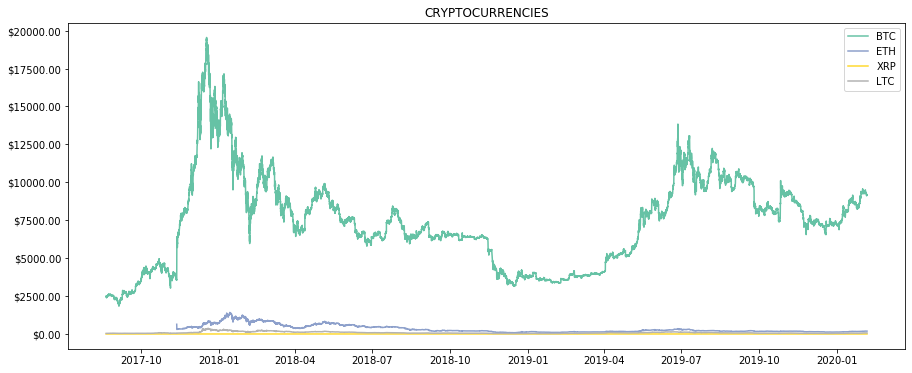

In [106]:
# Lets see how the price have evolved over time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[0].shape[0], 0, -1)]
ax.plot(x, ts_list_train[0], label=headers[0], c=colors(0))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[1].shape[0], 0, -1)]
ax.plot(x, ts_list_train[1], label=headers[1], c=colors(1))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[2].shape[0], 0, -1)]
ax.plot(x, ts_list_train[2], label=headers[2], c=colors(2))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[3].shape[0], 0, -1)]
ax.plot(x, ts_list_train[3], label=headers[3], c=colors(3))

ax.legend()
ax.set_title('CRYPTOCURRENCIES')
plt.show()


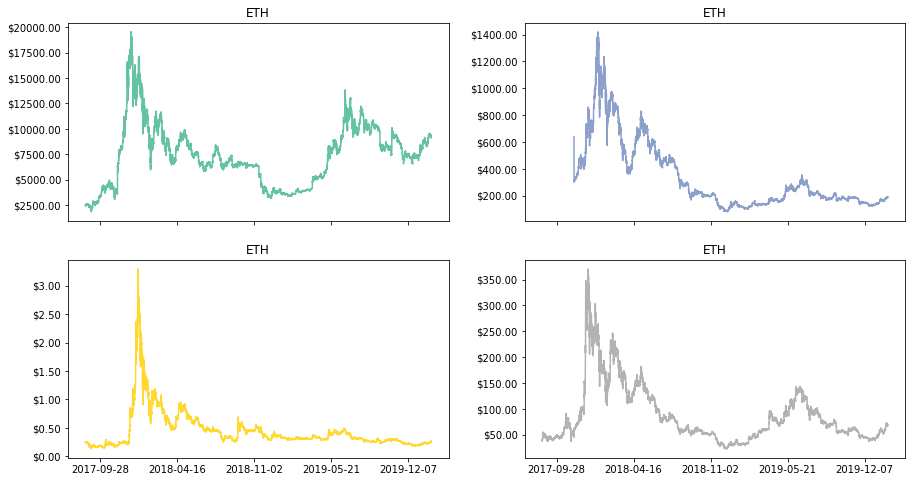

In [104]:
# Lets see how the price of these cryptocoins have evolved over time
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8), sharex=True)

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[0].shape[0], 0, -1)]
ax[0][0].plot(x, ts_list_train[0], label=headers[0], c=colors(0))
ax[0][0].set_title(headers[1])
ax[0][0].yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(5))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[1].shape[0], 0, -1)]
ax[0][1].plot(x, ts_list_train[1], label=headers[1], c=colors(1))
ax[0][1].set_title(headers[1])
ax[0][1].yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(5))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[2].shape[0], 0, -1)]
ax[1][0].plot(x, ts_list_train[2], label=headers[2], c=colors(2))
ax[1][0].set_title(headers[1])
ax[1][0].yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(5))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train[3].shape[0], 0, -1)]
ax[1][1].plot(x, ts_list_train[3], label=headers[3], c=colors(3))
ax[1][1].set_title(headers[1])
ax[1][1].yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(5))


plt.show()

# Preprocessing



It is important to scale features before training a neural network. Min-max normalization is a common way of doing this scaling.You could also use any other normalization method that rescales the values into a range of [0,1].

> MIN-MAX NORMALIZATION <br/>
><img src="https://www.oreilly.com/library/view/regression-analysis-with/9781788627306/assets/ffb3ac78-fd6f-4340-aa92-cde8ae0322d6.png" alt="min max formula" width="185"/>
><br/>
><img src="https://www.researchgate.net/publication/282541174/figure/fig1/AS:307388692353061@1450298583749/Min-max-method-of-normalization.png" alt="min max formula" width="350"/>







In [0]:
def normalize(ts, norm_params):
  """
  Apply min-max normalization
  :param data: time series
  :param norm_params: tuple with params mean, std, max, min
  :return: normalized time series
  """
  return (ts - norm_params['min']) / (norm_params['max'] - norm_params['min'])

In [0]:
#Let's normalize the data.
ts_list_train_norm = []
# Save training norm params in order to use it for the test data 
norm_params_list = []

for ts in ts_list_train:
  norm_params = {}
  norm_params['mean'] = ts.mean()
  norm_params['std'] = ts.std()
  norm_params['max'] = ts.max()
  norm_params['min'] = ts.min()
  norm_params_list.append(norm_params)

  ts_norm = normalize(ts, norm_params)
  ts_list_train_norm.append(ts_norm)


In [0]:
# Lets normalize the test data
ts_list_test_norm = []
for i, ts in enumerate(ts_list_test):
  norm_params = norm_params_list[i]
  ts_norm = normalize(ts, norm_params)
  ts_list_test_norm.append(ts_norm)


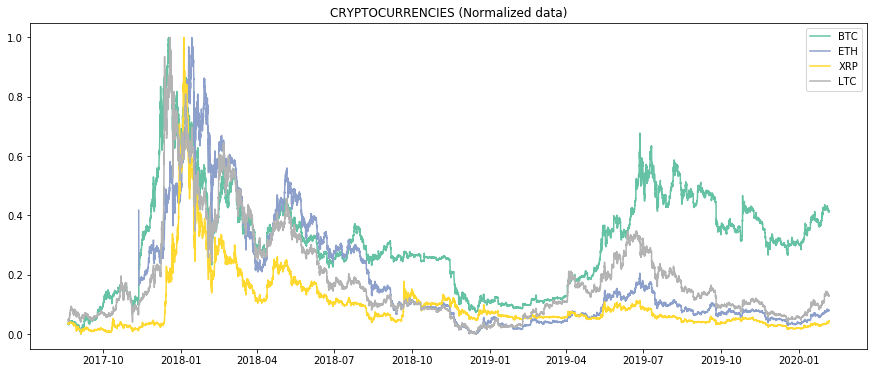

In [103]:
# This is how the time series look like now. I has kept 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train_norm[0].shape[0], 0, -1)]
ax.plot(x, ts_list_train_norm[0], label=headers[0], c=colors(0))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train_norm[1].shape[0], 0, -1)]
ax.plot(x, ts_list_train_norm[1], label=headers[1], c=colors(1))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train_norm[2].shape[0], 0, -1)]
ax.plot(x, ts_list_train_norm[2], label=headers[2], c=colors(2))

x = [most_recent_measure - datetime.timedelta(hours=i-1, minutes=0) for i  in range(ts_list_train_norm[3].shape[0], 0, -1)]
ax.plot(x, ts_list_train_norm[3], label=headers[3], c=colors(3))

ax.legend()
ax.set_title('CRYPTOCURRENCIES (Normalized data)')
plt.show()

Let's now create the data for the model. The model will be given the last 120 hours (5 days) recorded price values, and needs to learn to predict the price at the next time 24 hours. 

In [0]:
past_history = 120
forecast_horizon = 24

In [122]:
x_train, y_train = [], []
x_test, y_test = [], []

for i, ts in enumerate(ts_list_train_norm):
  # Train data
  ts_x_train, ts_y_train = [], []
  for j in range(0, ts.shape[0] - forecast_horizon + 1):
      indices = range(j - history_size, j, 1)
      # Reshape data from (history_size,) to (history_size, 1)
      ts_x_train.append(np.reshape(ts[indices], (history_size, 1)))
      ts_y_train.append(ts[j:j + forecast_horizon])
  x_train.extend(np.asarray(ts_x_train))
  y_train.extend(np.asarray(ts_y_train))
  # Test data
  ts_x_test = np.reshape(np.asarray(ts[-past_history:]), (history_size, 1))
  ts_y_test=  ts_list_test_norm[i]
  x_test.extend(np.asarray([ts_x_test]))
  #y_test.extend(np.asarray([ts_y_test]))
  #x_test.extend(np.asarray([ts_x_test]))
  y_test.append(np.asarray(ts_y_test))

x_train, y_train = np.asarray(x_train), np.asarray(y_train)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)

print("TRAINING DATA")
print("Input shape", x_train.shape)
print("Output_shape", y_train.shape)
print()
print("TEST DATA")
print("Input shape", x_test.shape)
print("Output_shape", y_test.shape)



TRAINING DATA
Input shape (84140, 120, 1)
Output_shape (84140, 24)

TEST DATA
Input shape (4, 120, 1)
Output_shape (4,)
